In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
#data about samples for test
#path_dclean = r"C:\Users\tania\Documents\FormationDataIronhack\Cours_semaine5\Projectweek5\Vanguard\data\clean\df_final_experiment_web_data_demo.csv"
#data_cleaned_total=pd.read_csv(path_dclean)
#demographical data
path_demo=r"C:\Users\tania\Documents\FormationDataIronhack\Cours_semaine5\Projectweek5\Vanguard\data\clean\clean_df_final_demo.csv"
data_demo=pd.read_csv(path_demo,low_memory=False)

In [4]:
data_demo.dtypes

client_id             int64
clnt_tenure_yr        int64
clnt_tenure_mnth      int64
clnt_age            float64
gendr                object
num_accts             int64
bal                 float64
calls_6_mnth          int64
logons_6_mnth         int64
Variation            object
dtype: object

EDA: population caracteristic

In [5]:
data_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6,73,60.5,U,2,45105.30,6,9,Test
1,2304905,7,94,58.0,U,2,110860.30,6,9,Control
2,1439522,5,64,32.0,U,2,52467.79,6,9,Test
3,1562045,16,198,49.0,M,2,67454.65,3,6,Test
4,5126305,12,145,33.0,F,2,103671.75,0,3,Control


In [6]:
data_demo.shape

(70594, 10)

In [7]:
data_demo.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'Variation'],
      dtype='object')

In [8]:
#correlation matrix considering genders removing gender for correlation matrix
# List of columns to encode
category = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']
df_selected_columns = data_demo[category].copy()

# Calculate the correlation matrix
correlation_matrix = df_selected_columns.corr()

# Print the correlation matrix
print(correlation_matrix)

                  clnt_tenure_yr  clnt_tenure_mnth  clnt_age  num_accts  \
clnt_tenure_yr          1.000000          0.998936  0.309372   0.152324   
clnt_tenure_mnth        0.998936          1.000000  0.309675   0.152028   
clnt_age                0.309372          0.309675  1.000000  -0.017689   
num_accts               0.152324          0.152028 -0.017689   1.000000   
bal                     0.203618          0.202881  0.209549   0.268746   
calls_6_mnth            0.049921          0.047897  0.026734   0.235405   
logons_6_mnth           0.048521          0.046694  0.084683   0.224409   

                       bal  calls_6_mnth  logons_6_mnth  
clnt_tenure_yr    0.203618      0.049921       0.048521  
clnt_tenure_mnth  0.202881      0.047897       0.046694  
clnt_age          0.209549      0.026734       0.084683  
num_accts         0.268746      0.235405       0.224409  
bal               1.000000      0.162167       0.165384  
calls_6_mnth      0.162167      1.000000       0.82

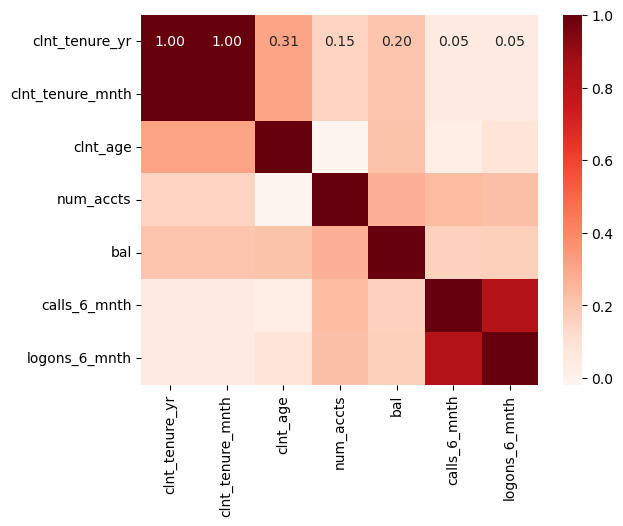

In [9]:
#Code that need adapting according to OS/version of packages
#sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt="d");
#plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Reds", fmt=".2f")
plt.show()

In [10]:
#modify df to consider 'clnt_age' ,'clnt_tenure_yr' and num_accts  as categorical variables
#Age column
data_demo = data_demo.assign(clnt_age_cat=pd.cut(data_demo['clnt_age'], bins=[0, 18, 25, 35, 45, 55, 65,75, 100], labels=['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74','over75']))
#Tenure column
data_demo = data_demo.assign(clnt_tenure_yr_cat=pd.cut(data_demo['clnt_tenure_yr'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, np.inf], labels=['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60+']))
#Number of account
data_demo = data_demo.assign(num_accts_cat=pd.cut(data_demo['clnt_tenure_yr'], bins=8,labels=[1,2,3,4,5,6,7,8]))

In [11]:
data_demo_modify = data_demo.copy()

In [12]:
data_demo.dtypes

client_id                int64
clnt_tenure_yr           int64
clnt_tenure_mnth         int64
clnt_age               float64
gendr                   object
num_accts                int64
bal                    float64
calls_6_mnth             int64
logons_6_mnth            int64
Variation               object
clnt_age_cat          category
clnt_tenure_yr_cat    category
num_accts_cat         category
dtype: object

In [13]:
data_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,clnt_age_cat,clnt_tenure_yr_cat,num_accts_cat
0,836976,6,73,60.5,U,2,45105.30,6,9,Test,55-64,5-9,1
1,2304905,7,94,58.0,U,2,110860.30,6,9,Control,55-64,5-9,1
2,1439522,5,64,32.0,U,2,52467.79,6,9,Test,25-34,0-4,1
3,1562045,16,198,49.0,M,2,67454.65,3,6,Test,45-54,15-19,2
4,5126305,12,145,33.0,F,2,103671.75,0,3,Control,25-34,10-14,2


In [14]:
data_demo.describe(include="all")

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,clnt_age_cat,clnt_tenure_yr_cat,num_accts_cat
count,7.059400e+04,70594.000000,70594.000000,70594.000000,70594,70594.000000,7.059400e+04,70594.000000,70594.000000,50487,70594,70594,70594.0
unique,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,2,8,12,8.0
top,NaN,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,Test,25-34,5-9,1.0
freq,NaN,NaN,NaN,NaN,24125,NaN,NaN,NaN,NaN,26961,14551,22223,31620.0
mean,5.005026e+06,12.053007,150.659999,46.442240,NaN,2.255532,1.474467e+05,3.382469,5.566720,NaN,NaN,NaN,NaN
std,2.877289e+06,6.871850,82.090264,15.591273,NaN,0.535000,3.015106e+05,2.236595,2.353296,NaN,NaN,NaN,NaN
min,1.690000e+02,2.000000,33.000000,13.500000,NaN,1.000000,1.378942e+04,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,2.519543e+06,6.000000,82.000000,32.500000,NaN,2.000000,3.734660e+04,1.000000,4.000000,NaN,NaN,NaN,NaN
50%,5.016974e+06,11.000000,136.000000,47.000000,NaN,2.000000,6.333459e+04,3.000000,5.000000,NaN,NaN,NaN,NaN
75%,7.483074e+06,16.000000,192.000000,59.000000,NaN,2.000000,1.375461e+05,6.000000,7.000000,NaN,NaN,NaN,NaN


In [ ]:
# List of columns to plot (wrong df name, copy passte from previous notebook)
columns_to_plot = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']

# Plot histograms for numerical columns and a count plot for 'gendr' keeping unknown
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    if column == 'gendr':
        sns.countplot(x=clean_df_final_demo[column])
        plt.title(f'Count Plot of {column}')
    else:
        sns.histplot(clean_df_final_demo[column], kde=True)
        plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [30]:
#stat calculations for numerical variables
def calc_stat(df, columns):
    # Initialize an empty list to store the stats for each column
    stats_list = []
    
    # Loop through each column in the list
    for column in columns:
        # Calculate the required statistics
        mean_column = df[column].mean()
        median_column = df[column].median()
        mode_column = df[column].mode().iloc[0]
        var_column = df[column].var()
        std_column = df[column].std()
        max_column = df[column].max()
        min_column = df[column].min()
        range_column = df[column].max() - df[column].min()
        quantiles_column = df[column].quantile([0.25, 0.5, 0.75]).to_list()
        
        # Append the results to the stats_list
        stats_list.append({
            'Column': column,
            'Mean': mean_column,
            'Median': median_column,
            'Mode': mode_column,
            'Variance': var_column,
            'Standard Deviation': std_column,
            'Maximal': max_column,
            'Minimal': min_column,          
            'Range': range_column,
            '25th Percentile': quantiles_column[0],
            '50th Percentile': quantiles_column[1],
            '75th Percentile': quantiles_column[2]
        })

    # Convert the stats_list to a DataFrame for better presentation
    stats_df = pd.DataFrame(stats_list)
    
    return stats_df

In [16]:
calc_stat(data_demo,['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'])

,Column,Mean,Median,Mode,Variance,Standard Deviation,Maximal,Minimal,Range,25th Percentile,50th Percentile,75th Percentile
0,clnt_tenure_yr,12.053007,11.00,6.00,4.722233e+01,6.871850,62.00,2.00,60.00,6.0000,11.00,16.0000
1,clnt_tenure_mnth,150.659999,136.00,58.00,6.738811e+03,82.090264,749.00,33.00,716.00,82.0000,136.00,192.0000
2,clnt_age,46.442240,47.00,58.50,2.430878e+02,15.591273,96.00,13.50,82.50,32.5000,47.00,59.0000
3,num_accts,2.255532,2.00,2.00,2.862248e-01,0.535000,8.00,1.00,7.00,2.0000,2.00,2.0000
4,bal,147446.726528,63334.59,31188.62,9.090863e+10,301510.583591,16320040.15,13789.42,16306250.73,37346.5975,63334.59,137546.1175
5,calls_6_mnth,3.382469,3.00,6.00,5.002356e+00,2.236595,7.00,0.00,7.00,1.0000,3.00,6.0000
6,logons_6_mnth,5.566720,5.00,9.00,5.538003e+00,2.353296,9.00,1.00,8.00,4.0000,5.00,7.0000


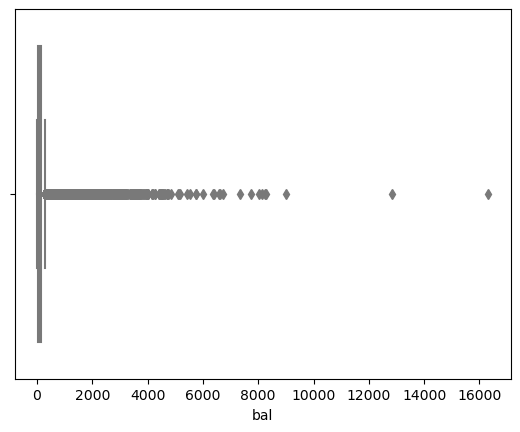

In [17]:
#plot bal (fig avec outliners
sns.boxplot(x = data_demo['bal']/1000, color="lightblue");


In [18]:
#Dropping outliners for bal
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers
    
data_series =data_demo ['bal']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
#print(outliers)
data_demo.iloc[~outliers.index,:] # ~ = NOT

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,clnt_age_cat,clnt_tenure_yr_cat,num_accts_cat
70586,2690705,15,181,53.0,F,2,24910.52,3,3,NaN,45-54,10-14,2
70585,6746156,8,106,32.0,F,2,19019.55,1,1,NaN,25-34,5-9,1
70584,4851159,6,79,60.0,U,2,74501.76,4,4,NaN,55-64,5-9,1
70572,424250,14,177,56.5,M,2,135143.26,4,4,NaN,55-64,10-14,2
70556,3987156,4,53,53.0,U,2,177851.22,7,7,NaN,45-54,0-4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2892152,4,58,36.0,U,2,46815.48,5,8,Test,35-44,0-4,1
13,2214073,16,193,62.5,M,3,136818.03,6,9,Test,55-64,15-19,2
10,8368822,8,100,34.5,U,2,75578.54,0,3,Control,25-34,5-9,1
4,5126305,12,145,33.0,F,2,103671.75,0,3,Control,25-34,10-14,2


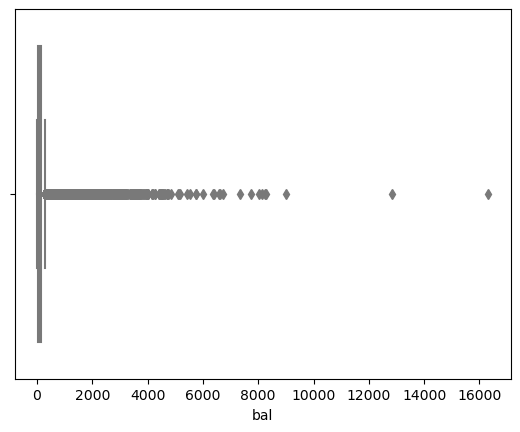

In [19]:
#plot bal (fig sans outliners)
sns.boxplot(x = data_demo['bal']/1000, color="lightblue");

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


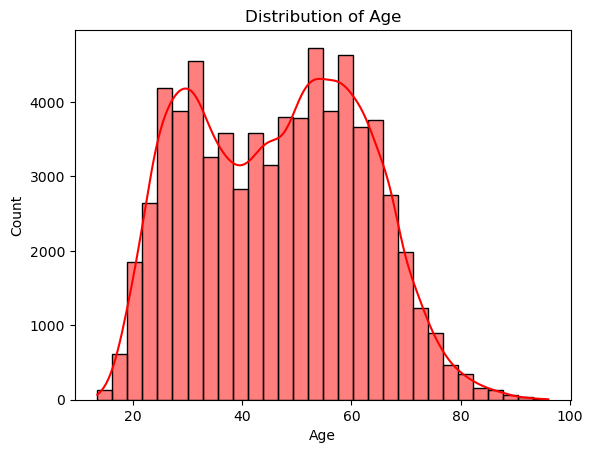

In [20]:
# Plot a histogram of a numerical variable : age by 30 bins
sns.histplot(data=data_demo, x='clnt_age',  bins=30,kde=True,color='red')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

# Show the plot
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


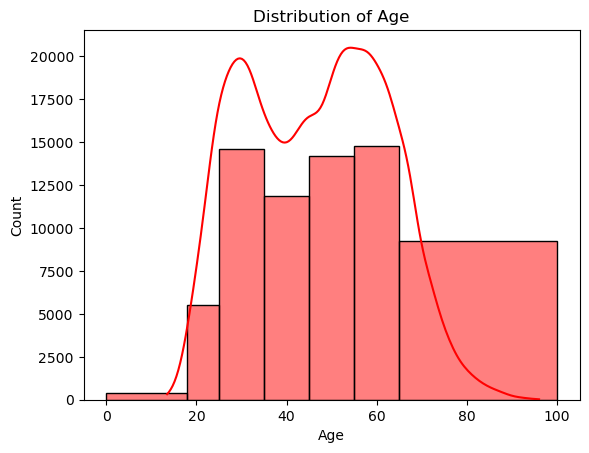

In [21]:
# Plot a histogram of a numerical variable : age by logical group
sns.histplot(data=data_demo, x='clnt_age',  bins=[0, 18, 25, 35, 45, 55, 65, 100],kde=True,color='red')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

# Show the plot
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


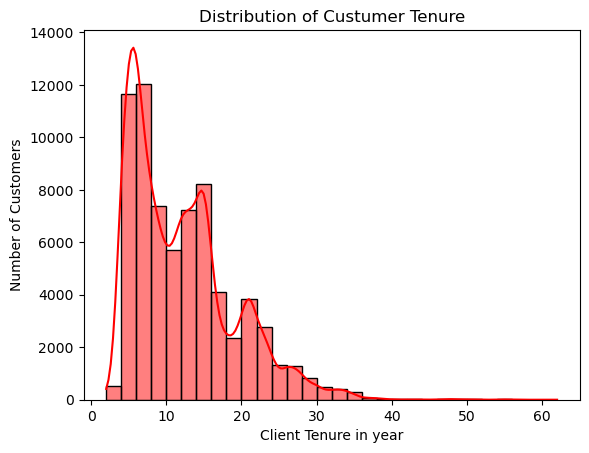

In [23]:
# Plot a histogram of clnt_tenure__yr
sns.histplot(data=data_demo, x='clnt_tenure_yr', bins=30,kde=True,color='red')

# Add labels and title
plt.xlabel('Client Tenure in year')
plt.ylabel('Number of Customers')
plt.title('Distribution of Custumer Tenure')

# Show the plot
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


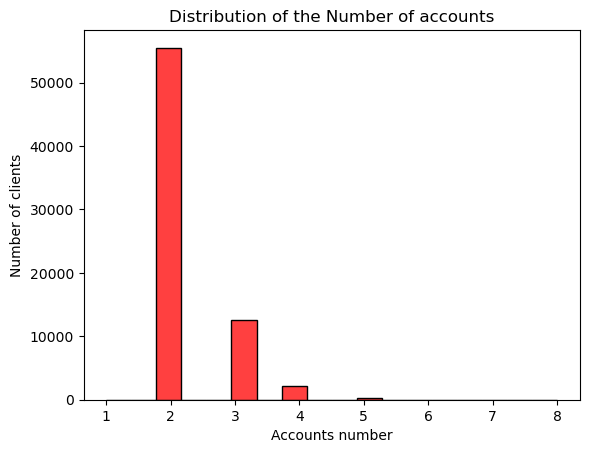

In [25]:
# Plot a histogram of num_accts
sns.histplot(data=data_demo, x='num_accts',color='red')

# Add labels and title
plt.xlabel('Accounts number')
plt.ylabel('Number of clients')
plt.title('Distribution of the Number of accounts')

# Show the plot
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


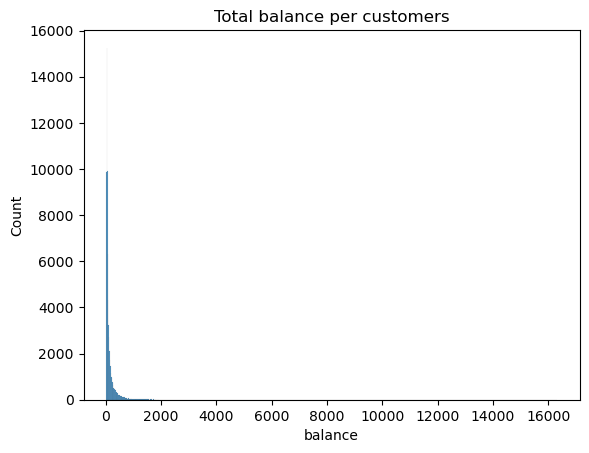

In [20]:
sns.histplot(data=data_demo, x=(data_demo['bal']/1000),bins=1000)

# Add labels and title
plt.xlabel('balance')
plt.ylabel('Count')
plt.title('Total balance per customers')

# Show the plot
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


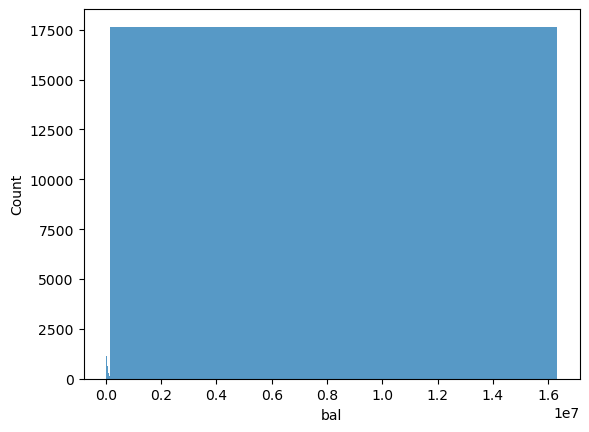

In [17]:
# Define the bin edges
#max_value = data_demo['bal'].max()  # Find the maximum value in the column
#bins = np.linspace(data_demo['bal'].min(), 1.375461e+05, 99)  # 29 bins up to the specified value
#bins = np.append(bins, max_value)  # Append the maximum value to create the 30th bin

# Create the histogram plot
#sns.histplot(data=data_demo, x='bal', bins=bins)

# Display the plot
#plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


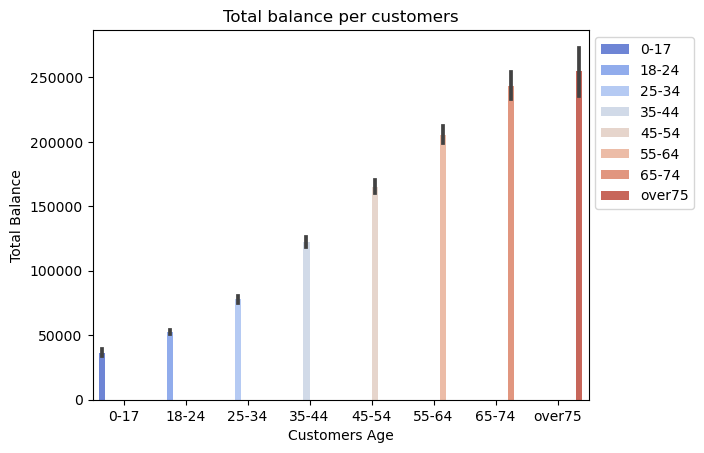

In [26]:
#plot val  by age
sns.barplot(data=data_demo, x='clnt_age_cat', y='bal', palette="coolwarm", hue='clnt_age_cat');
# Add labels and title
plt.xlabel('Customers Age')
plt.ylabel('Total Balance')
plt.title('Total balance per customer')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

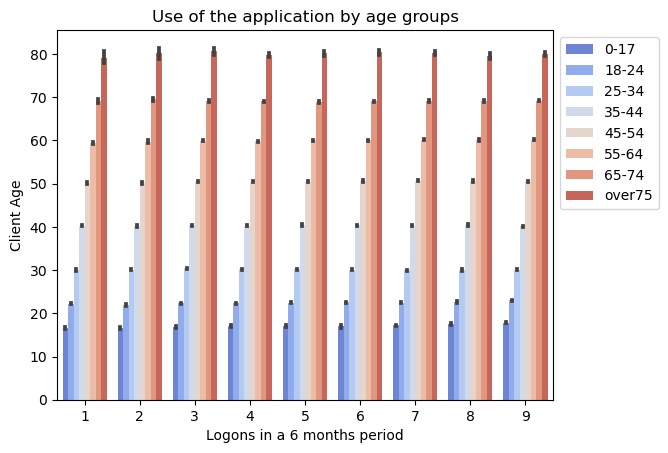

In [28]:
#plot of nb call and nb connection vs age/bal calls_6_mnth	logons_6_mnth
sns.barplot(data=data_demo, x='logons_6_mnth', y='clnt_age', palette="coolwarm", hue='clnt_age_cat');
plt.xlabel('Logons in a 6 months period')
plt.ylabel('Client Age')
plt.title('Use of the application by age groups')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

C:\Users\tania\AppData\Local\Temp\ipykernel_18032\121239751.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data_demo, x='logons_6_mnth', y='clnt_age', palette="red",);
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


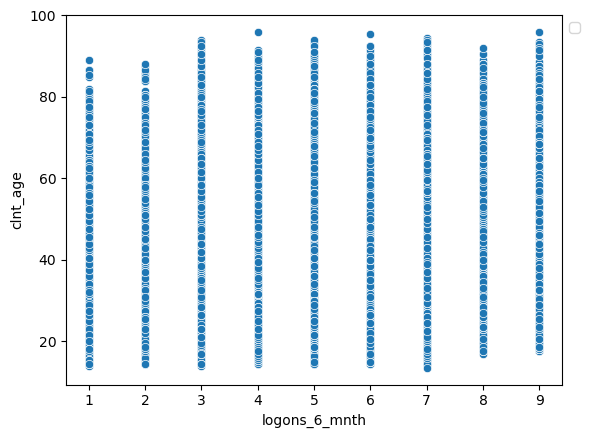

In [66]:
#plot of nb call and nb connection vs age/bal calls_6_mnth	logons_6_mnth
sns.scatterplot(data=data_demo, x='logons_6_mnth', y='clnt_age', palette="red",);
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

C:\Users\tania\AppData\Local\Temp\ipykernel_32980\3403509223.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data_demo, x='logons_6_mnth', y='bal', palette="coolwarm",color="red");
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


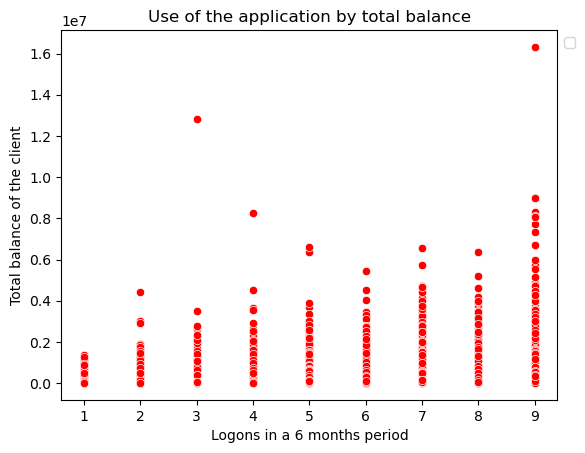

In [29]:
#plot of nb call and nb connection vs age/bal calls_6_mnth	logons_6_mnth
sns.scatterplot(data=data_demo, x='logons_6_mnth', y='bal', palette="coolwarm",color="red");
plt.xlabel('Logons in a 6 months period')
plt.ylabel('Total balance of the client')
plt.title('Use of the application by total balance')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [36]:
#Function to perform chi2tests between columns
from scipy.stats import chi2_contingency 
def chi2_test(df, col1, col2):
    # Create a contingency table between the two specified columns
    contingency_table = pd.crosstab(df[col1], df[col2])
    
    # Perform the chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'column1': [col1],
        'column2': [col2],
        'p-value': [p],
        'statistic': [chi2],
        'dof': [dof]
    })

In [23]:
#Function pour faire des test chi2 entre groupes
from scipy.stats import chi2_contingency  
  
def Qui2test(df, columns):  
   results = []  
   for col in columns:  
      contingency_table = pd.crosstab(df[col], df['Variation'])  
      chi2, p, dof, expected = chi2_contingency(contingency_table)  
      results.append({'column': col, 'p-value': p, 'statistic': chi2})  
   return results

In [ ]:
Tests=Qui2test(data_cleaned_total,category)
pd.DataFrame(Tests)

CLT & Hypotheisis testing

In [29]:
#sample creation
path_demo_mdofif=r"C:\Users\tania\Documents\FormationDataIronhack\Cours_semaine5\Projectweek5\Vanguard\data\clean\data_demo_modify.csv"
# Creating a filtered dataframe for value "Test" in column "Variation"
df_test =data_demo[data_demo['Variation'] == 'Test'].copy()
path_df_test=r"C:\Users\tania\Documents\FormationDataIronhack\Cours_semaine5\Projectweek5\Vanguard\data\clean\df_test.csv"
# Creating a filtered dataframe for value "Control" in column "Variation"
df_control = data_demo[data_demo['Variation'] == 'Control'].copy()
path_df_control=r"C:\Users\tania\Documents\FormationDataIronhack\Cours_semaine5\Projectweek5\Vanguard\data\clean\df_control.csv"
data_demo_modify.to_csv(path_demo_mdofif, index=False)
df_test.to_csv(path_df_test, index=False)
df_control.to_csv(path_df_control, index=False)

In [63]:
df_control.shape, df_test.shape

((23526, 13), (26961, 13))

In [50]:
df_control.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'Variation',
       'clnt_age_cat', 'clnt_tenure_yr_cat', 'num_accts_cat'],
      dtype='object')

In [39]:
#functions to compare samples to the population, alternative two-sided
from scipy import stats
def ttest_1samp(population_df, sample_df, column_name):  

   # Extract the column of interest from the population and sample dataframes  
   population_values = population_df[column_name]  
   sample_values = sample_df[column_name]  
  
   # Perform the one-sample t-test  
   t_stat, p_val = stats.ttest_1samp(sample_values, population_values.mean())  
  
   return t_stat, p_val

In [40]:
ttest_1samp(data_demo, df_control,'clnt_age')

(10.436944208471173, 1.9109723700909505e-25)

In [41]:
ttest_1samp(data_demo, df_test,'clnt_age')

(7.637954813630302, 2.2800957270135073e-14)

In [48]:
def ttest_1samp_less(population_df, sample_df, column_name):  
 
   # Extract the column of interest from the population and sample dataframes  
   population_values = population_df[column_name]  
   sample_values = sample_df[column_name]  
  
   # Perform the one-sample t-test  
   t_stat, p_val = stats.ttest_1samp(sample_values, population_values.mean(),alternative='less')  
  
   return t_stat, p_val

In [44]:
ttest_1samp_less(data_demo, df_test,'clnt_age')

(7.637954813630302, 0.9999999999999886)

In [45]:
ttest_1samp_less(data_demo, df_test,'clnt_tenure_yr')

(-1.6817202368976092, 0.04631734184935687)

In [53]:
#function to compare two samples from the same population, alternative two-sided
from scipy.stats import ttest_ind
# Convert columns to numeric and handle errors
for column in columns:
    df_control[column] = pd.to_numeric(df_control[column], errors='coerce')
    df_test[column] = pd.to_numeric(df_test[column], errors='coerce')

# Drop rows with NaN values in specified columns
df_control = df_control.dropna(subset=columns)
df_test = df_test.dropna(subset=columns)

# Create an empty list to store the results
results = []  

# Loop through the columns and apply the t-test
for column in columns:  
    t_stat, p_val = ttest_ind(df_control[column], df_test[column])  
    results.append({'column': column, 't_stat': t_stat, 'p_val': p_val})  

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)  

# Print the results
print(results_df)  

           column    t_stat     p_val
0  clnt_tenure_yr  1.714887  0.086372
1        clnt_age  2.416146  0.015689
2       num_accts  2.102157  0.035544
3             bal  0.441342  0.658967
4    calls_6_mnth  3.444647  0.000572
5   logons_6_mnth  3.317964  0.000907


In [54]:
# Convert columns to numeric and handle errors
for column in columns:
    df_control[column] = pd.to_numeric(df_control[column], errors='coerce')
    df_test[column] = pd.to_numeric(df_test[column], errors='coerce')

# Drop rows with NaN values in specified columns
df_control = df_control.dropna(subset=columns)
df_test = df_test.dropna(subset=columns)

# Create an empty list to store the results
results = []  

# Loop through the columns and apply the t-test
for column in columns:  
    t_stat, p_val = ttest_ind(df_control[column], df_test[column],alternative='less')  
    results.append({'column': column, 't_stat': t_stat, 'p_val': p_val})  

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)  

# Print the results
print(results_df) 

           column    t_stat     p_val
0  clnt_tenure_yr  1.714887  0.956814
1        clnt_age  2.416146  0.992155
2       num_accts  2.102157  0.982228
3             bal  0.441342  0.670516
4    calls_6_mnth  3.444647  0.999714
5   logons_6_mnth  3.317964  0.999546


In [55]:
# Convert columns to numeric and handle errors
for column in columns:
    df_control[column] = pd.to_numeric(df_control[column], errors='coerce')
    df_test[column] = pd.to_numeric(df_test[column], errors='coerce')

# Drop rows with NaN values in specified columns
df_control = df_control.dropna(subset=columns)
df_test = df_test.dropna(subset=columns)

# Create an empty list to store the results
results = []  

# Loop through the columns and apply the t-test
for column in columns:  
    t_stat, p_val = ttest_ind(df_control[column], df_test[column],alternative='greater')  
    results.append({'column': column, 't_stat': t_stat, 'p_val': p_val})  

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)  

# Print the results
print(results_df)

           column    t_stat     p_val
0  clnt_tenure_yr  1.714887  0.043186
1        clnt_age  2.416146  0.007845
2       num_accts  2.102157  0.017772
3             bal  0.441342  0.329484
4    calls_6_mnth  3.444647  0.000286
5   logons_6_mnth  3.317964  0.000454


In [56]:
df_control.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,2.352600e+04,23526.000000,23526.000000,23526.000000,23526.000000,2.352600e+04,23526.000000,23526.000000
mean,5.013676e+06,12.087860,151.062102,47.498427,2.259925,1.501519e+05,3.129176,6.166242
std,2.877414e+06,6.877626,82.127663,15.521781,0.538568,2.958124e+05,2.184541,2.173053
min,1.028000e+03,2.000000,33.000000,17.000000,2.000000,2.378961e+04,0.000000,3.000000
25%,2.515177e+06,6.000000,82.000000,33.500000,2.000000,4.012295e+04,1.000000,4.000000
50%,5.023832e+06,11.000000,137.000000,48.500000,2.000000,6.603145e+04,3.000000,6.000000
75%,7.483638e+06,16.000000,192.000000,60.000000,2.000000,1.406156e+05,5.000000,8.000000
max,9.998921e+06,55.000000,669.000000,96.000000,7.000000,8.292996e+06,6.000000,9.000000


In [57]:
df_test.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,2.696100e+04,26961.000000,26961.000000,26961.000000,26961.000000,2.696100e+04,26961.000000,26961.000000
mean,4.999639e+06,11.982901,149.852899,47.163922,2.249917,1.489626e+05,3.061941,6.101851
std,2.877510e+06,6.844947,81.783390,15.514461,0.529335,3.073737e+05,2.190590,2.177119
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.516570e+06,6.000000,82.000000,33.500000,2.000000,3.972920e+04,1.000000,4.000000
50%,5.025928e+06,11.000000,134.000000,47.500000,2.000000,6.546836e+04,3.000000,6.000000
75%,7.470213e+06,15.000000,191.000000,59.500000,2.000000,1.394786e+05,5.000000,8.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


In [58]:
data_demo.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,bal,calls_6_mnth,logons_6_mnth
count,7.059400e+04,70594.000000,70594.000000,70594.000000,7.059400e+04,70594.000000,70594.000000
mean,5.005026e+06,12.053007,150.659999,46.442240,1.474467e+05,3.382469,5.566720
std,2.877289e+06,6.871850,82.090264,15.591273,3.015106e+05,2.236595,2.353296
min,1.690000e+02,2.000000,33.000000,13.500000,1.378942e+04,0.000000,1.000000
25%,2.519543e+06,6.000000,82.000000,32.500000,3.734660e+04,1.000000,4.000000
50%,5.016974e+06,11.000000,136.000000,47.000000,6.333459e+04,3.000000,5.000000
75%,7.483074e+06,16.000000,192.000000,59.000000,1.375461e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,1.632004e+07,7.000000,9.000000
